###  Mapping Linux Shell Commands to MITRE ATT&CK using NLP-Based Approach

In [ ]:
import csv
from datetime import datetime
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt

from lxml import etree
from urllib.request import urlopen

In [ ]:
# headers = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}
headers = {
            'User-agent'  : 'Internet Explorer/2.0',
            'SOAPAction'  : 'http://www.corp.net/some/path/CustMsagDown.Check',
            'Content-type': 'text/xml'
        }
response = requests.get("https://man7.org/linux/man-pages/dir_section_1.html", headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')
parsed = soup.find_all('td')

cmd = []
name = []
desc = []
is_posix = []

for link in soup.find_all('a'):
    _link = link.get('href')
    try:
        if _link.startswith('./man1'):
            _linkFull = 'https://man7.org/linux/man-pages' + _link[1:]
            response = requests.get(_linkFull, headers=headers)
            soup = BeautifulSoup(response.text, 'html.parser')
            parsed_name = soup.find('a', {"id": re.compile(r'(NAME)|(Name)')}).findNext('pre')
            name.append(parsed_name.text)
            cmd.append(_link.split('/')[-1].split('.')[0])
            if _link.split('/')[-1].split('.')[1] == '1p':
                is_posix.append(True)
            else: 
                is_posix.append(False)
            try:
                parsed_desc = soup.find('a', {"id": re.compile(r'(DESCRIPTION)|(Description)')}).findNext('pre')
                desc.append(parsed_desc.text)
            except:
                desc.append(False)
                print('No description')
    except:
        print("Warning!!!")
        

response = requests.get("https://man7.org/linux/man-pages/dir_section_8.html", headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')
parsed = soup.find_all('td')

for link in soup.find_all('a'):
    _link = link.get('href')
    try:
        if _link.startswith('./man8'):
            _linkFull = 'https://man7.org/linux/man-pages' + _link[1:]
            response = requests.get(_linkFull, headers=headers)
            soup = BeautifulSoup(response.text, 'html.parser')
            parsed_name = soup.find('a', {"id": re.compile(r'(NAME)|(Name)')}).findNext('pre')
            name.append(parsed_name.text)
            cmd.append(_link.split('/')[-1].split('.')[0])
            if _link.split('/')[-1].split('.')[1] == '8p':
                is_posix.append(True)
            else: 
                is_posix.append(False)
            try:
                parsed_desc = soup.find('a', {"id": re.compile(r'(DESCRIPTION)|(Description)')}).findNext('pre')
                desc.append(parsed_desc.text)
            except:
                desc.append(False)
                print('No description')
    except:
        print("Warning!!!")

No description
No description
No description
No description
No description
No description
No description
No description
No description
Warning!!!
Warning!!!
Warning!!!
Warning!!!
No description
No description
No description
No description
No description
No description
No description
No description
No description
Warning!!!
No description
No description
Warning!!!
No description
No description
No description
No description
No description
No description
No description
No description
No description
Warning!!!
No description
No description
No description
No description
No description


In [ ]:
# df = pd.read_csv("commands.csv")
df = pd.DataFrame({
    'command': cmd,
    'name': name,
    'description': desc,
    'is_posix': is_posix
})

In [ ]:
df.head()

,command,name,description,is_posix
0,abicompat,\n abicompat - check ABI compatibility\n...,False,False
1,abidiff,\n abidiff - compare ABIs of ELF files\n...,False,False
2,abidw,\n abidw - serialize the ABI of an ELF f...,False,False
3,abilint,\n abilint - validate an abigail ABI rep...,False,False
4,abipkgdiff,\n abipkgdiff - compare ABIs of ELF file...,False,False


In [ ]:
len(df)

2736

In [ ]:
df_nonDuplicated = df[~df.duplicated('command', keep=False)]
df_duplicated = df[df.duplicated('command', keep=False)]

df_duplicated = df_duplicated[df_duplicated['is_posix'] == False]

df = pd.concat([df_nonDuplicated, df_duplicated])

name_clean = []

for i in range(len(df)):
    cmd = df.iloc[i]['command']
    name = df.iloc[i]['name']
    name = name.replace(cmd, '').replace("\n\n", ".\n").replace('\n', ' ').split()
    name = " ".join(name).removeprefix('-').removeprefix(',').strip()
    name_clean.append(name)
    
df['name_clean'] = name_clean

desc_clean = []

for i in range(len(df)):
    cmd = df.iloc[i]['command']
    try:
        name = df.iloc[i]['description']
        name = name.replace(cmd, '').replace("\n\n", ".\n").replace('\n', ' ').split()
    except:
        name = df.iloc[i]['name']
        name = name.replace(cmd, '').replace("\n\n", ".\n").replace('\n', ' ').split()
    name = " ".join(name).removeprefix('-').removeprefix(',').strip()
    desc_clean.append(name)
    
df['desc_clean'] = desc_clean

df.head(10)

AttributeError: ignored

AttributeError: 'str' object has no attribute 'removeprefix'

'removeprefix' only avaiable in >= Python 3.9.0

In [ ]:
df_mitre = pd.read_csv("enterprise-attack.csv")
df_mitre.head()

,name,id,url,platforms,kill chain phases,description,data sources,detection
0,Data Obfuscation,T1001,https://attack.mitre.org/techniques/T1001,"Linux, macOS, Windows",Command and Control,Adversaries may obfuscate command and control ...,Network Traffic: Network Traffic Content,Analyze network data for uncommon data flows (...
1,Junk Data,T1001.001,https://attack.mitre.org/techniques/T1001/001,"Linux, macOS, Windows",Command and Control,Adversaries may add junk data to protocols use...,Network Traffic: Network Traffic Content,Analyze network data for uncommon data flows (...
2,Steganography,T1001.002,https://attack.mitre.org/techniques/T1001/002,"Linux, macOS, Windows",Command and Control,Adversaries may use steganographic techniques ...,Network Traffic: Network Traffic Content,Analyze network data for uncommon data flows (...
3,Protocol Impersonation,T1001.003,https://attack.mitre.org/techniques/T1001/003,"Linux, Windows, macOS",Command and Control,Adversaries may impersonate legitimate protoco...,Network Traffic: Network Traffic Content,Analyze network data for uncommon data flows (...
4,OS Credential Dumping,T1003,https://attack.mitre.org/techniques/T1003,"Windows, Linux, macOS",Credential Access,Adversaries may attempt to dump credentials to...,Active Directory: Active Directory Object Acce...,# Windows #\n\nMonitor for unexpected process...


In [ ]:
df_mitre['platforms'].value_counts()

Windows                                                                      129
Linux, macOS, Windows                                                        111
PRE                                                                           80
Linux, Windows, macOS                                                         18
macOS                                                                         17
                                                                            ... 
Windows, IaaS, Network, Linux, macOS, Containers                               1
Windows, SaaS, IaaS, Linux, macOS                                              1
Windows, Linux, macOS, IaaS, Network                                           1
Linux, Windows, macOS, IaaS, Containers                                        1
Windows, Office 365, Linux, macOS, IaaS, SaaS, Azure AD, Google Workspace      1
Name: platforms, Length: 80, dtype: int64

In [ ]:
mask = df_mitre['platforms'].apply(lambda x: x.split(', ')).apply(lambda x: 'Linux' in x)
df_mitre = df_mitre[mask]

In [ ]:
df_mitre['platforms'].value_counts()

Linux, macOS, Windows                                                                             111
Linux, Windows, macOS                                                                              18
Windows, macOS, Linux                                                                              16
Windows, Linux, macOS                                                                              15
Linux, macOS, Windows, Network                                                                     15
Linux, macOS                                                                                       12
Windows, Azure AD, Office 365, SaaS, IaaS, Linux, macOS, Google Workspace, Containers               8
Linux                                                                                               8
macOS, Windows, Linux                                                                               8
Windows, Azure AD, Office 365, SaaS, IaaS, Linux, macOS, Google Workspace         

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import string
import re
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    4. Remove words
    '''
    # stemmer = WordNetLemmatizer()
    stemmer = SnowballStemmer('english')
    text = re.sub('[^A-Za-z]+', ' ', text)
    nopunc = [word for word in text]
    nopunc = ''.join([i for i in nopunc if not i.isdigit()])
    nopunc =  [word.lower() for word in text.split() if word not in stopwords.words('english')]
    return [stemmer.stem(word) for word in nopunc]
    # return [word for word in nopunc]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(min_df=0.005, analyzer=text_process)
vectorizer.fit(df['desc_clean']) #, df_mitre['description']]))

TfidfVectorizer(analyzer=<function text_process at 0x000002082268DA60>,
                min_df=0.005)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_model = vectorizer.transform(df['desc_clean'])

tf_model_df_command = pd.DataFrame(tf_model.toarray(), columns = vectorizer.get_feature_names_out())
tf_model_df_command.head(10)

,a,abbrevi,abil,abl,abort,absolut,accept,access,accord,account,...,xfs,xml,y,yes,yet,you,yum,z,zero,zone
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.185723,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.575805,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
5,0.073343,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.187167,0.0,0.000000,0.099853,0.0
6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.058618,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.056318,0.000000,0.0
9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.042177,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_model_mitre = vectorizer.transform(df_mitre['description'])

tf_model_df_mitre = pd.DataFrame(tf_model_mitre.toarray(), columns = vectorizer.get_feature_names_out())
# tf_model_df_mitre.head(10)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
res = cosine_similarity(tf_model_mitre, tf_model)

In [ ]:
df_res = pd.DataFrame(res, columns = df['command'])
df_res = df_res.set_index(df_mitre['name'])

In [ ]:
_res = pd.DataFrame(df_res['curl'].sort_values(ascending=False)[:5]).reset_index()
_res.columns = ["name", "score"]
_res # For command curl, these are the "most similar", or the most appropriate MITRE ATT&CK Techniques according to our model

,name,score
0,Lateral Tool Transfer,0.297258
1,Ingress Tool Transfer,0.259854
2,File Transfer Protocols,0.245178
3,Service Exhaustion Flood,0.195549
4,Application Layer Protocol,0.190501


In [ ]:
tf_model_df_mitre

,a,abbrevi,abil,abl,abort,absolut,abus,accept,access,accomplish,...,xfs,xml,y,yes,yet,you,yum,z,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.101739,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.055461,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
443,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
444,0.0,0.0,0.0,0.0,0.0,0.0,0.092295,0.082123,0.172171,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
445,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
vectorizer = TfidfVectorizer(min_df=0.01, analyzer=text_process)
tf_model = vectorizer.fit_transform(df_mitre['description'])
tf_model_df = pd.DataFrame(tf_model.toarray(), columns = vectorizer.get_feature_names_out())

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
cost =[]
for i in range(1, 25):
    KM = KMeans(n_clusters = i, n_init = 100, max_iter = 500, copy_x=True)
    KM.fit(tf_model_df)
     
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)  

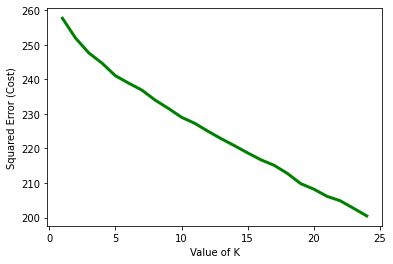

In [ ]:
# plot the cost against K values
plt.plot(range(1, 25), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot

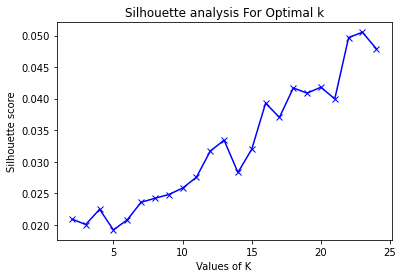

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = []
for num_clusters in range(2,25):
    
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(tf_model_df)
    cluster_labels = kmeans.labels_
 
    # silhouette score
    silhouette_avg.append(silhouette_score(tf_model_df, cluster_labels))

plt.plot(range(2,25), silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

## Unrelated to this class, but good to know

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

C:\Users\yevon\AppData\Local\Temp\ipykernel_26068\1464059737.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


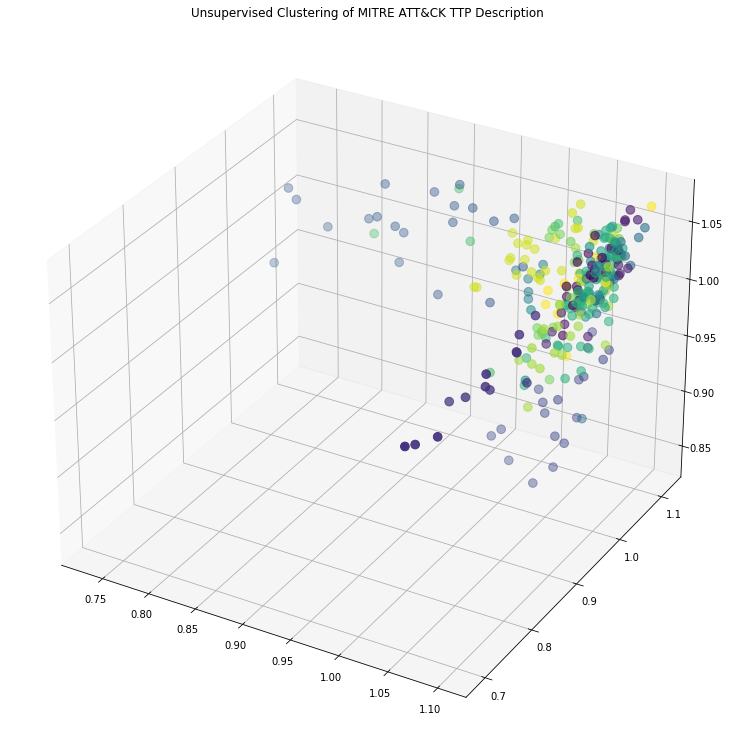

In [ ]:
from sklearn.cluster import KMeans
mod = KMeans(algorithm='lloyd', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=100, tol=0.0001, verbose=0)
res = mod.fit_transform(tf_model_df)
fig=plt.figure(figsize=(10,10))
ax=Axes3D(fig)
ax.scatter(res[:,4], res[:,2], res[:,3], c=mod.predict(tf_model_df), marker='o', s=75)
plt.title("Unsupervised Clustering of MITRE ATT&CK TTP Description")
plt.show()

In [ ]:
df_mitre['cluster'] = mod.predict(tf_model_df)

In [ ]:
_res_cluster = pd.DataFrame(df_mitre['cluster'].value_counts()).reset_index()
_res_cluster.columns = ["cluster", "number of members in cluster"]
_res_cluster

,cluster,number of members in cluster
0,9,49
1,12,31
2,13,24
3,5,23
4,0,21
5,4,20
6,3,18
7,11,16
8,1,16
9,2,13
